# Libraries

In [16]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.model_selection import train_test_split,GridSearchCV

import pickle 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix



# Data Collection 

In [2]:
df=pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


<Axes: ylabel='species'>

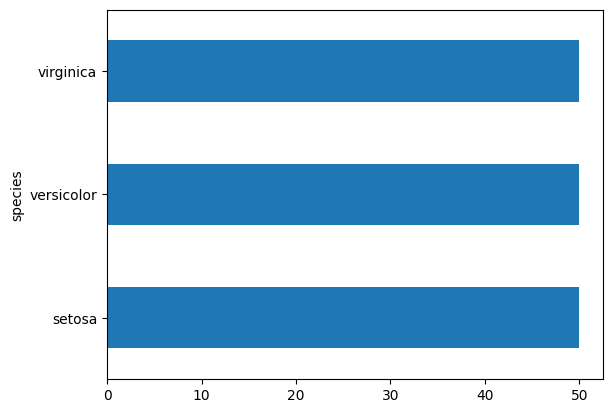

In [4]:
df['species'].value_counts().plot(kind='barh')

## Define x and y

In [5]:
x=df.drop(['species'],axis=1)
y=df['species']

# Preprocessing

In [6]:
pipe=Pipeline(steps=[('scalar',StandardScaler())])

In [7]:
x1=pd.DataFrame(pipe.fit_transform(x),columns=pipe.get_feature_names_out())
x1

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


In [10]:
with open('pipe.pkl','wb') as file1:
    pickle.dump(pipe,file1)

In [11]:
la=LabelEncoder()

In [12]:
y1=la.fit_transform(y)
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
with open('encoder','wb') as file2:
    pickle.dump(la,file2)

# Train Test Split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=23)

# Model building with tuning

In [17]:
kn=KNeighborsClassifier()

In [18]:
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [19]:
grid={'n_neighbors':[2,3,4,5,6,7,8]}

In [20]:
gs=GridSearchCV(kn,param_grid=grid,cv=2)
gs.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8]})

In [21]:
gs.best_params_

{'n_neighbors': 8}

In [22]:
best_knn=gs.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=8)

# Training Data Evaluation 

In [23]:
y_pred_train=best_knn.predict(x_train)

acc=accuracy_score(y_pred_train,y_train)
clf=classification_report(y_pred_train,y_train)
cnf=confusion_matrix(y_pred_train,y_train)

print('Accuracy:',acc)
print('classification Report:\n',clf)
print('Confusion Matrix:\n',cnf)

Accuracy: 0.9583333333333334
classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.98      0.91      0.94        45
           2       0.90      0.97      0.94        37

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

Confusion Matrix:
 [[38  0  0]
 [ 0 41  4]
 [ 0  1 36]]


# Testing data Evaluation 

In [24]:
y_pred=best_knn.predict(x_test)

acc1=accuracy_score(y_pred,y_test)
clf1=classification_report(y_pred,y_test)
cnf1=confusion_matrix(y_pred,y_test)

print('Accuracy:',acc1)
print('classification Report:\n',clf1)
print('Confusion Matrix:\n',cnf1)

Accuracy: 0.9666666666666667
classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.89      0.94         9
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix:
 [[12  0  0]
 [ 0  8  1]
 [ 0  0  9]]


# Unseen Data Prediction

In [25]:
def predict_data(le,num_pipe,model):
    sepal_length=float(input('Enter the sepal length'))
    sepal_width=float(input('Enter the sepal_width:'))
    petal_length=float(input('Enter the petal length:'))
    petal_width=float(input('Enter the petal_width:'))

    x1=pd.DataFrame([sepal_length,sepal_width,petal_length,petal_width]).T
    x1.columns=x.columns

    print('Data Before Preprocessing:\n',x1)

    x_pre1=num_pipe.transform(x1)
    x_pre2=pd.DataFrame(x_pre1,columns=num_pipe.get_feature_names_out())

    print('After Preprocessing:\n',x_pre2)

    y_pred1=model.predict(x_pre2)
    label=le.inverse_transform(y_pred1)[0]

    prob=model.predict_proba(x_pre1).max()

    prediction=f'{label} with probability {prob}'
    print('Prediction:',prediction)

    return label,prob

In [26]:
predict_data(la,pipe,best_knn)

Data Before Preprocessing:
    sepal_length  sepal_width  petal_length  petal_width
0           2.0          1.0           3.0          4.0
After Preprocessing:
    sepal_length  sepal_width  petal_length  petal_width
0     -4.656885    -4.735915     -0.430828     3.686579
Prediction: versicolor with probability 0.75


d:\Deploy_june_24\repository\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


('versicolor', np.float64(0.75))